# Numpy, the foundation of data science

Lino Galiana  
2024-08-27

<div class="alert alert-info" role="alert">
<h3 class="alert-heading">Version 🇫🇷</h3>
This is the French version 🇫🇷 of that chapter,to see the English version go <a href="https://pythonds.linogaliana.fr/content/manipulation/01_numpy.html">there</a>
</div>

# 1. Introduction

This chapter serves as an introduction to *Numpy* to ensure that the basics of vector calculations with `Python` are mastered. The first part of the chapter presents small exercises to practice some basic functions of `Numpy`. The end of the chapter presents more in-depth practical exercises using `Numpy`.

It is recommended to regularly refer to the [*numpy cheatsheet*](https://www.datacamp.com/community/blog/python-numpy-cheat-sheet) and the [official documentation](https://numpy.org/doc/stable/) if you have any doubts about a function.

In this chapter, we will adhere to the convention of importing `Numpy` as follows:

In [2]:
import numpy as np

We will also set the seed of the random number generator to obtain reproducible results:

In [3]:
np.random.seed(12345)

# 2. Concept of *array*

In the world of data science, as will be discussed in more depth in the upcoming chapters, the central object is the two-dimensional data table. The first dimension corresponds to rows and the second to columns. If we only consider one dimension, we refer to a variable (a column) of our data table. It is therefore natural to link data tables to the mathematical objects of matrices and vectors.

`NumPy` (`Numerical Python`) is the foundational brick for processing numerical lists or strings of text as matrices. `NumPy` comes into play to offer this type of object and the associated standardized operations that do not exist in the basic `Python` language.

The central object of `NumPy` is the **`array`**, which is a multidimensional data table. A `Numpy` array can be one-dimensional and considered as a vector (`1d-array`), two-dimensional and considered as a matrix (`2d-array`), or, more generally, take the form of a multidimensional object (`Nd-array`), a sort of nested table.

Simple arrays (one or two-dimensional) are easy to represent and cover most of the use-case related to `Numpy`. We will discover in the next chapter on `Pandas` that, in practice, we usually don’t directly use `Numpy` since it is a low-level library. A `Pandas` *DataFrame* is constructed from a collection of one-dimensional arrays (the variables of the table), which allows performing coherent (and optimized) operations with the variable type. Having some `Numpy` knowledge is useful for understanding the logic of vector manipulation, making data processing more readable, efficient, and reliable.

Compared to a list,

-   an *array* can only contain one type of data (`integer`, `string`, etc.), unlike a list.
-   operations implemented by `Numpy` will be more efficient and require less memory.

Geographical data will constitute a slightly more complex construction than a traditional `DataFrame`. The geographical dimension takes the form of a deeper table, at least two-dimensional (coordinates of a point). However, geographical data manipulation libraries will handle this increased complexity.

## 2.1 Creating an array

We can create an array in several ways. To create an array from a list, simply use the `array` method:

In [4]:
np.array([1,2,5])

array([1, 2, 5])

It is possible to add a `dtype` argument to constrain the array type:

In [5]:
np.array([["a","z","e"],["r","t"],["y"]], dtype="object")

array([list(['a', 'z', 'e']), list(['r', 't']), list(['y'])], dtype=object)

There are also practical methods for creating arrays:

-   Logical sequences: `np.arange` (sequence) or `np.linspace` (linear interpolation between two bounds)
-   Ordered sequences: array filled with zeros, ones, or a desired number: `np.zeros`, `np.ones`, or `np.full`
-   Random sequences: random number generation functions: `np.rand.uniform`, `np.rand.normal`, etc.
-   Matrix in the form of an identity matrix: `np.eye`

This gives, for logical sequences:

In [6]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
np.arange(0,10,3)

array([0, 3, 6, 9])

In [8]:
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

For an array initialized to 0:

In [9]:
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

or initialized to 1:

In [10]:
np.ones((3, 5), dtype=float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

or even initialized to 3.14:

In [11]:
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

Finally, to create the matrix $I_3$:

In [12]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercise 1</h3>

Generate:

-   $X$ a random variable, 1000 repetitions of a $U(0,1)$ distribution
-   $Y$ a random variable, 1000 repetitions of a normal distribution with zero mean and variance equal to 2
-   Verify the variance of $Y$ with `np.var`

</div>

# 3. Indexing and slicing

## 3.1 Logic illustrated with a one-dimensional array

The simplest structure is the one-dimensional array:

In [15]:
x = np.arange(10)
print(x)

[0 1 2 3 4 5 6 7 8 9]

Indexing in this case is similar to that of a list:

-   The first element is 0
-   The nth element is accessible at position $n-1$

The logic for accessing elements is as follows:

``` python
x[start:stop:step]
```

With a one-dimensional array, the slicing operation (keeping a slice of the array) is very simple. For example, to keep the first *K* elements of an array, you would do:

``` python
x[:(K-1)]
```

In this case, you select the K$^{th}$ element using:

``` python
x[K-1]
```

To select only one element, you would do:

In [17]:
x = np.arange(10)
x[2]

2

The syntax for selecting particular indices from a list also works with arrays.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercise 2</h3>

Take `x = np.arange(10)` and…

-   Select elements 0, 3, 5 from `x`
-   Select even elements
-   Select all elements except the first
-   Select the first 5 elements

</div>

## 3.2 Regarding performance

A key element in the performance of `Numpy` compared to lists, when it comes to slicing, is that an array does not return a copy of the element in question (a copy that costs memory and time) but simply a view of it.

When it is necessary to make a copy, for example to avoid altering the underlying array, you can use the `copy` method:

``` python
x_sub_copy = x[:2, :2].copy()
```

It is also possible, and more practical, to select data based on logical conditions (an operation called a ***boolean mask***). This functionality will mainly be used to perform data filtering operations.

For simple comparison operations, logical comparators may be sufficient. These comparisons also work on multidimensional arrays thanks to broadcasting, which we will discuss later:

In [20]:
x = np.arange(10)
x2 = np.array([[-1,1,-2],[-3,2,0]])
print(x)
print(x2)

[0 1 2 3 4 5 6 7 8 9]
[[-1  1 -2]
 [-3  2  0]]

In [21]:
x==2
x2<0

array([[ True, False,  True],
       [ True, False, False]])

To select the observations related to the logical condition, just use the `numpy` slicing logic that works with logical conditions.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercise 3</h3>

Given

``` python
x = np.random.normal(size=10000)
```

1.  Keep only the values whose absolute value is greater than 1.96
2.  Count the number of values greater than 1.96 in absolute value and their proportion in the whole set
3.  Sum the absolute values of all observations greater (in absolute value) than 1.96 and relate them to the sum of the values of `x` (in absolute value)

</div>

Whenever possible, it is recommended to use `numpy`’s logical functions (optimized and well-handling dimensions). Among them are:

-   `count_nonzero` ;
-   `isnan` ;
-   `any` or `all` especially with the `axis` argument ;
-   `np.array_equal` to check element-by-element equality.

Let’s create `x` a multidimensional array and `y` a one-dimensional array with a missing value.

In [24]:
x = np.random.normal(0, size=(3, 4))
y = np.array([np.nan, 0, 1])

# 4. Manipulating an array

## 4.1 Manipulation functions

`Numpy` provides standardized methods or functions for modifying
here’s a table showing some of them:

Here are some functions to modify an array:

| Operation                                                  | Implementation                                 |
|------------------------------|------------------------------------------|
| Flatten an array                                           | `x.flatten()` (method)                         |
| Transpose an array                                         | `x.T` (method) or `np.transpose(x)` (function) |
| Append elements to the end                                 | `np.append(x, [1,2])`                          |
| Insert elements at a given position (at positions 1 and 2) | `np.insert(x, [1,2], 3)`                       |
| Delete elements (at positions 0 and 3)                     | `np.delete(x, [0,3])`                          |

To combine arrays, you can use, depending on the case, the functions `np.concatenate`, `np.vstack` or the method `.r_` (row-wise concatenation). `np.hstack` or the method `.column_stack` or `.c_` (column-wise concatenation).

In [26]:
x = np.random.normal(size = 10)

To sort an array, use `np.sort`

In [27]:
x = np.array([7, 2, 3, 1, 6, 5, 4])

np.sort(x)

array([1, 2, 3, 4, 5, 6, 7])

If you want to perform a partial reordering to find the *k* smallest values in an `array` without sorting them, use `partition`:

In [28]:
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

For classical descriptive statistics, `Numpy` offers a number of already implemented functions, which can be combined with the `axis` argument.

In [29]:
x = np.random.normal(0, size=(3, 4))

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercise 5</h3>

1.  Sum all the elements of an `array`, the elements by row, and the elements by column. Verify the consistency.
2.  Write a function `statdesc` to return the following values: mean, median, standard deviation, minimum, and maximum. Apply it to `x` using the *axis* argument.

</div>

# 5. Broadcasting

Broadcasting refers to a set of rules for applying operations to arrays of different dimensions. In practice, it generally consists of applying a single operation to all members of a `numpy` array.

The difference can be understood from the following example. Broadcasting allows the scalar `5` to be transformed into a 3-dimensional array:

In [35]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])

a + b
a + 5

array([5, 6, 7])

Broadcasting can be very practical for efficiently performing operations on data with a complex structure. For more details, visit [here](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html) or [here](https://stackoverflow.com/questions/47435526/what-is-the-meaning-of-axis-1-in-keras-argmax).

## 5.1 Application: programming your own k-nearest neighbors

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercise (a bit more challenging)</h3>

1.  Create `X`, a two-dimensional array (i.e., a matrix) with 10 rows and 2 columns. The numbers in the array are random.
2.  Import the `matplotlib.pyplot` module as `plt`. Use `plt.scatter` to plot the data as a scatter plot.
3.  Construct a 10x10 matrix storing, at element $(i,j)$, the Euclidean distance between points $X[i,]$ and $X[j,]$. To do this, you will need to work with dimensions by creating nested arrays using `np.newaxis`:

-   First, use `X1 = X[:, np.newaxis, :]` to transform the matrix into a nested array. Check the dimensions.
-   Create `X2` of dimension `(1, 10, 2)` using the same logic.
-   Deduce, for each point, the distance with other points for each coordinate. Square this distance.
-   At this stage, you should have an array of dimension `(10, 10, 2)`. The reduction to a matrix is obtained by summing over the last axis. Check the help of `np.sum` on how to sum over the last axis.
-   Finally, apply the square root to obtain a proper Euclidean distance.

1.  Verify that the diagonal elements are zero (distance of a point to itself…).
2.  Now, sort for each point the points with the most similar values. Use `np.argsort` to get the ranking of the closest points for each row.
3.  We are interested in the k-nearest neighbors. For now, set k=2. Use `argpartition` to reorder each row so that the 2 closest neighbors of each point come first, followed by the rest of the row.
4.  Use the code snippet below to graphically represent the nearest neighbors.

</div>

<details><summary>A hint for graphically representing the nearest neighbors</summary>

``` python
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')
```

</details>

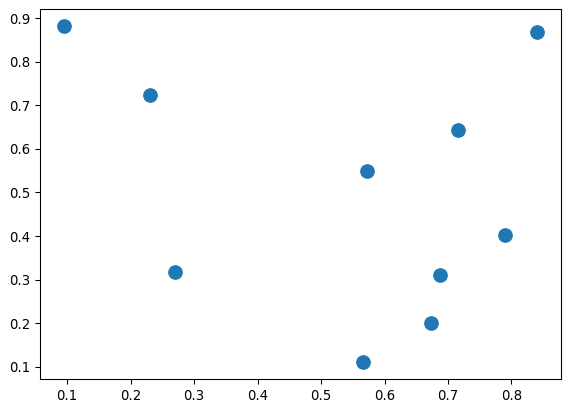

Question 7 result is :

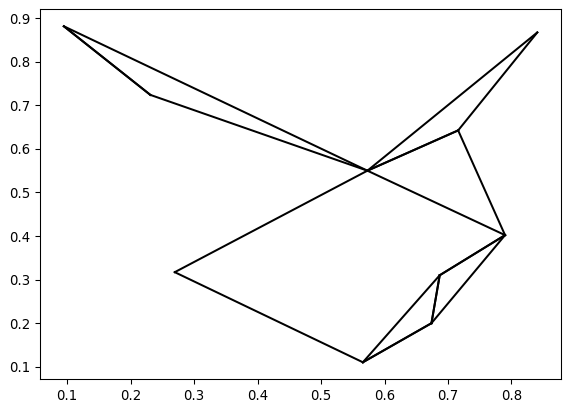

Did I invent this challenging exercise? Not at all, it comes from the book [*Python Data Science Handbook*](https://jakevdp.github.io/PythonDataScienceHandbook/02.08-sorting.html#Example:-k-Nearest-Neighbors). But if I had told you this immediately, would you have tried to answer the questions?

Moreover, it would not be a good idea to generalize this algorithm to large datasets. The complexity of our approach is $O(N^2)$. The algorithm implemented by `Scikit-Learn` is $O[NlogN]$.

Additionally, computing matrix distances using the power of GPU (graphics cards) would be faster. In this regard, the library [faiss](https://github.com/facebookresearch/faiss), or the dedicated frameworks for computing distance between high-dimensional vectors like [ChromaDB](https://www.trychroma.com/) offer much more satisfactory performance than `Numpy` for this specific problem.

# 6. Additional Exercises

`Google` became famous thanks to its `PageRank` algorithm. This algorithm allows, from links between websites, to give an importance score to a website which will be used to evaluate its centrality in a network. The objective of this exercise is to use `Numpy` to implement such an algorithm from an adjacency matrix that links the sites together.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Comprendre le principe de l’algorithme PageRank</h3>

`Google` est devenu célèbre grâce à son algorithme `PageRank`. Celui-ci permet, à partir
de liens entre sites *web*, de donner un score d’importance à un site *web* qui va
être utilisé pour évaluer sa centralité dans un réseau.
L’objectif de cet exercice est d’utiliser `Numpy` pour mettre en oeuvre un tel
algorithme à partir d’une matrice d’adjacence qui relie les sites entre eux.

1.  Créer la matrice suivante avec `numpy`. L’appeler `M`:

$$
\begin{bmatrix}
0 & 0 & 0 & 0 & 1 \\
0.5 & 0 & 0 & 0 & 0 \\
0.5 & 0 & 0 & 0 & 0 \\
0 & 1 & 0.5 & 0 & 0 \\
0 & 0 & 0.5 & 1 & 0
\end{bmatrix}
$$

1.  Pour représenter visuellement ce *web* minimaliste,
    convertir en objet `networkx` (une librairie spécialisée
    dans l’analyse de réseau) et utiliser la fonction `draw`
    de ce package.

Il s’agit de la transposée de la matrice d’adjacence
qui permet de relier les sites entre eux. Par exemple,
le site 1 (première colonne) est référencé par
les sites 2 et 3. Celui-ci ne référence que le site 5.

1.  A partir de la page wikipedia anglaise de `PageRank`, tester
    sur votre matrice.

</div>

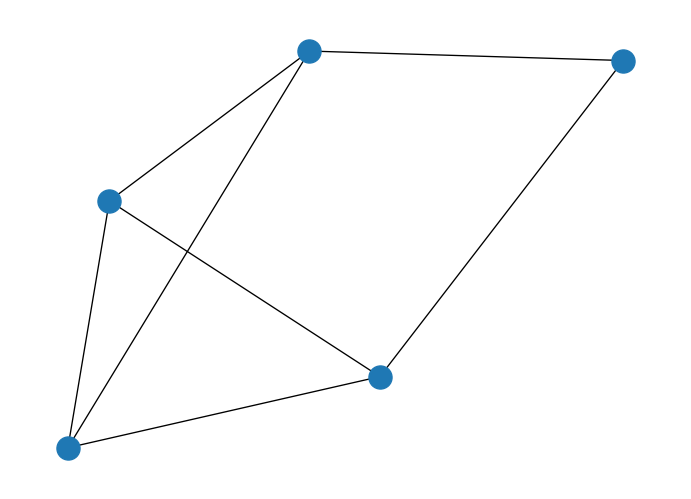

Site 1 is quite central because it is referenced twice. Site 5 is also central since it is referenced by site 1.

array([[0.25419178],
       [0.13803151],
       [0.13803151],
       [0.20599017],
       [0.26375504]])